## Import Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load data

In [57]:
raw_data = pd.read_csv('Used-Car-Prizes.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Exploring Data

In [58]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [59]:
raw_data.describe(include=[object])

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

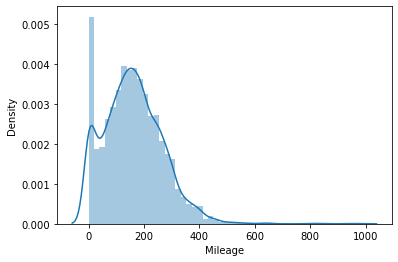

In [60]:
sns.distplot(raw_data['Mileage'])

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

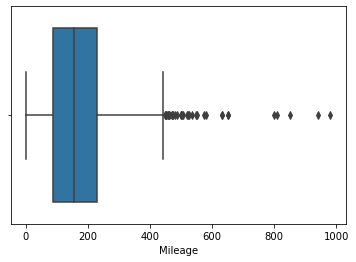

In [61]:
sns.boxplot(raw_data['Mileage'])

### Address Null Values

In [62]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

<AxesSubplot:>

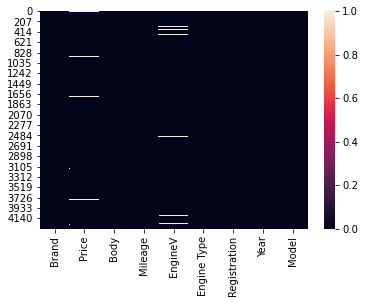

In [63]:
sns.heatmap(raw_data.isnull())

In [64]:
#data_no_null = raw_data.dropna(axis=0)

#raw_data['Price'] = raw_data['Price'].fillna((raw_data['Price'].mode()))
#raw_data['EngineV'] = raw_data['EngineV'].fillna((raw_data['EngineV'].mode()))
raw_data['Price'] = raw_data.groupby('Brand')['Price'].transform(lambda x: x.fillna(x.mode()))
#cl1['value'] = cl1.groupby('sec')['value'].transform(lambda x: x.fillna(x.mean()))
data_no_null = raw_data.dropna(axis=0)

<AxesSubplot:>

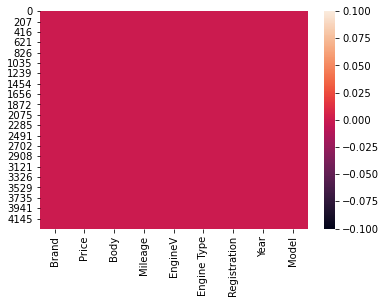

In [65]:
sns.heatmap(data_no_null.isnull())

### Address Outliers

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

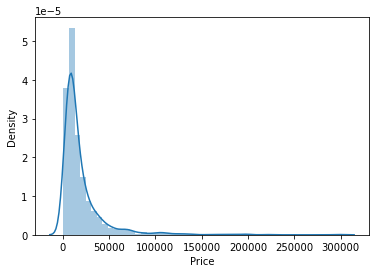

In [66]:
sns.distplot(data_no_null['Price'])

In [67]:
### Remove top 1% of the Price in the dataset

q = data_no_null['Price'].quantile(0.995)
data_1 = data_no_null[data_no_null['Price']<q]

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

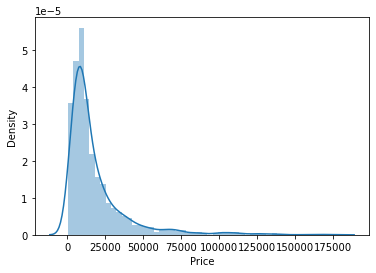

In [68]:
sns.distplot(data_1['Price'])

In [69]:
data_1.describe()

,Price,Mileage,EngineV,Year
count,4004.000000,4004.000000,4004.000000,4004.000000
mean,18486.603137,164.366134,2.751189,2006.336164
std,21061.726772,103.072590,4.945153,6.684599
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,92.000000,1.800000,2003.000000
50%,11500.000000,159.000000,2.200000,2007.000000
75%,21500.000000,230.000000,3.000000,2012.000000
max,177000.000000,980.000000,99.990000,2016.000000


/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

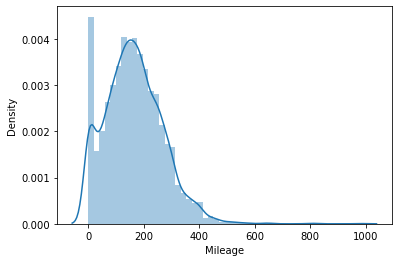

In [70]:
sns.distplot(data_1['Mileage'])

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

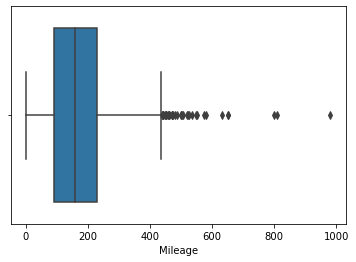

In [71]:
sns.boxplot(data_1['Mileage'])

In [72]:
### Remove top 1% of the Mileage in the dataset

q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

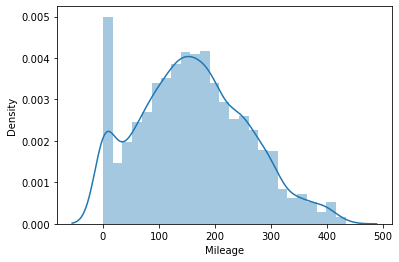

In [73]:
sns.distplot(data_2['Mileage'])

In [74]:
data_2.describe()

,Price,Mileage,EngineV,Year
count,3963.000000,3963.000000,3963.000000,3963.000000
mean,18592.482705,160.675246,2.754974,2006.436286
std,21109.033386,96.278869,4.969939,6.605733
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,90.000000,1.800000,2003.000000
50%,11500.000000,157.000000,2.200000,2008.000000
75%,21650.000000,228.000000,3.000000,2012.000000
max,177000.000000,433.000000,99.990000,2016.000000


In [75]:
data_2['EngineV'].unique()

array([ 2.  ,  2.9 ,  5.  ,  4.2 ,  2.7 ,  1.5 ,  1.8 ,  1.79,  4.7 ,
        2.5 ,  2.4 ,  1.4 ,  3.  ,  2.2 ,  1.3 ,  2.3 ,  3.8 ,  4.8 ,
        1.9 ,  2.8 ,  2.15,  5.5 ,  3.5 ,  4.4 ,  1.6 ,  4.  ,  3.2 ,
        2.98,  1.1 ,  2.6 ,  0.65,  4.5 ,  1.7 ,  4.6 ,  3.6 ,  2.99,
        1.  , 99.99,  5.7 ,  1.2 ,  3.7 ,  6.  , 19.  , 15.  ,  6.3 ,
        6.2 ,  4.3 , 30.  , 28.  , 22.  ,  1.33,  2.1 ,  2.14, 55.  ,
        1.39,  7.2 , 20.  ,  5.2 , 74.  ,  4.67, 66.  , 90.  ,  5.46,
        1.46,  0.6 ,  1.59,  2.57,  4.66, 75.  ,  9.  ,  2.17,  6.5 ])

In [76]:
### Consider engines only with less then 7 lt

data_3 = data_2[data_2['EngineV']<9]

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

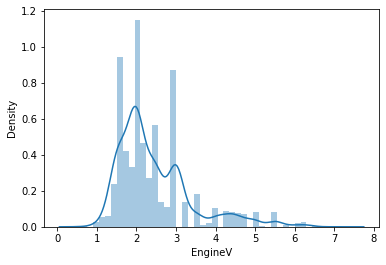

In [77]:
sns.distplot(data_3['EngineV'])

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

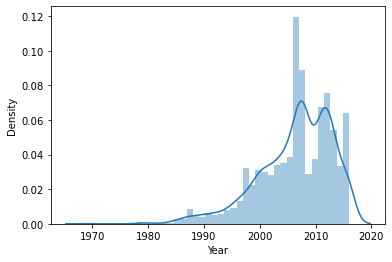

In [78]:
sns.distplot(data_3['Year'])

In [79]:
### Remove bottom 1% of the Year in the dataset

q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

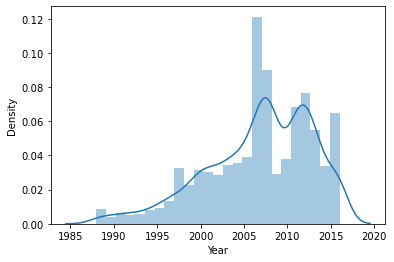

In [80]:
sns.distplot(data_4['Year'])

In [81]:
## Reindex due to removing the observations
data_cleaned = data_4.reset_index(drop=True)

In [82]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3888.000000,3888.000000,3888.000000,3888.000000
mean,18866.883516,159.712706,2.461659,2006.756944
std,21206.300048,95.862145,0.962475,6.113524
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,90.000000,1.800000,2003.000000
50%,11703.900000,156.000000,2.200000,2008.000000
75%,21999.000000,225.000000,3.000000,2012.000000
max,177000.000000,433.000000,7.200000,2016.000000


In [83]:
data_cleaned.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.542274,0.404942,0.552141
Mileage,-0.542274,1.000000,-0.009188,-0.717819
EngineV,0.404942,-0.009188,1.000000,-0.005710
Year,0.552141,-0.717819,-0.005710,1.000000


<AxesSubplot:>

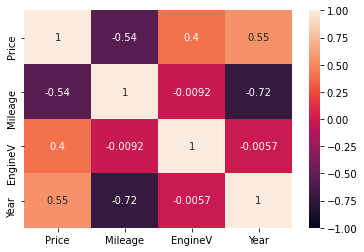

In [84]:
sns.heatmap(data_cleaned.corr(), vmin=-1, vmax=1, annot=True)

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

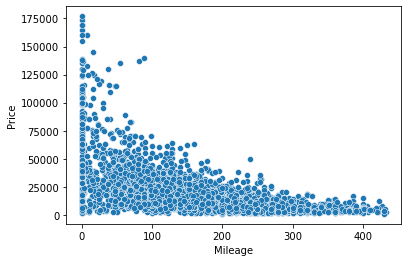

In [85]:
sns.scatterplot(data_cleaned['Mileage'], data_cleaned['Price'])

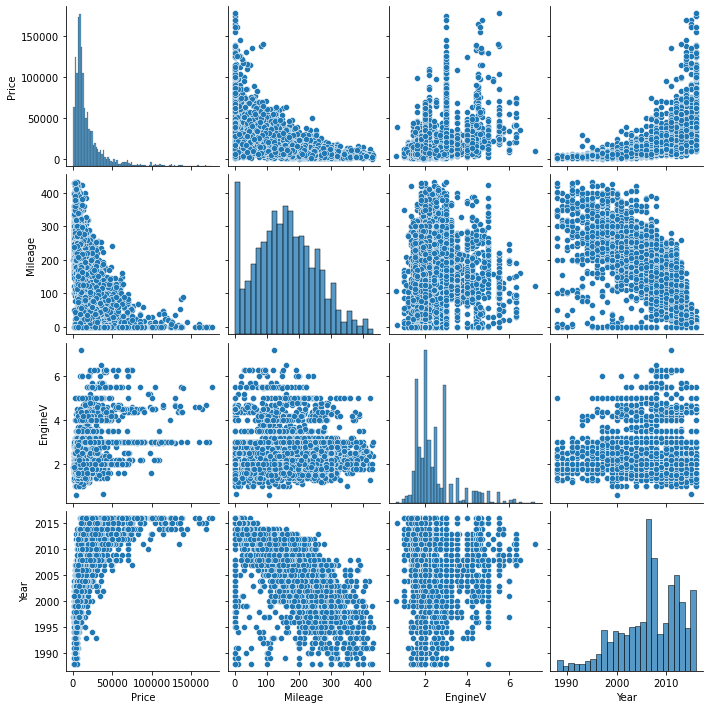

In [86]:
sns.pairplot(data_cleaned)

In [87]:
#Transform Price with log transformation
log_price = np.log(data_cleaned['Price'])

#Add the new data to the dataframe
data_cleaned['log_price'] = log_price

#Drop the Price as we will use log_price
data_cleaned_with_price_transform = data_cleaned.drop(['Price'], axis=1)

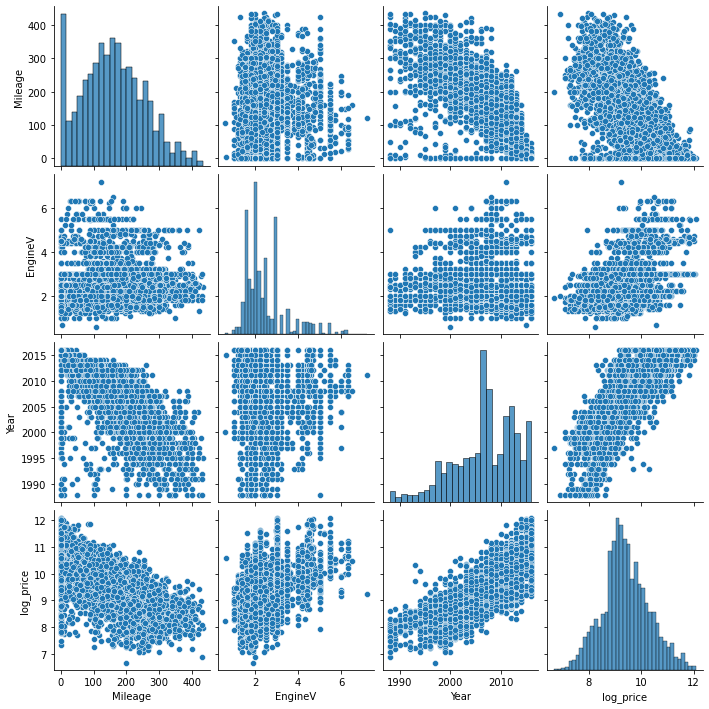

In [88]:
### Observe that the log_price is normally distributed after the log transformation on price. 
### The scatter plots for log_price, engine, year and mileage are now more linear than before.
sns.pairplot(data_cleaned_with_price_transform)

<AxesSubplot:>

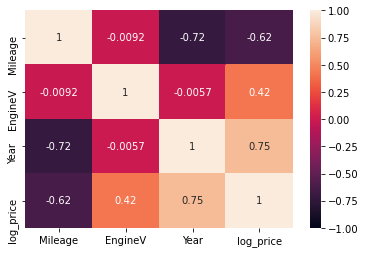

In [89]:
sns.heatmap(data_cleaned_with_price_transform.corr(), vmin=-1, vmax=1, annot=True)

In [90]:
## MultiCollineartiy - Calculate variance inflation factors for independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned_with_price_transform[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns


In [91]:
vif

,VIF,Features
0,3.749141,Mileage
1,10.321059,Year
2,7.542145,EngineV


In [92]:
## Remove Year
data_no_multicollinearity = data_cleaned_with_price_transform.drop(['Year'],axis=1)

## Remove Model
data_no_multicollinearity = data_cleaned_with_price_transform.drop(['Model'],axis=1)
data_no_multicollinearity.head()


,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


## Preprocess Catagorical Variables

In [93]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [94]:
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [95]:
data_with_dummies.shape

(3888, 19)

## Feature Selection

In [96]:
## Feature selection for catogorical variables

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = data_with_dummies.drop(['log_price'],axis=1)
target = data_with_dummies['log_price']

f_values, p_values = f_classif(features, target)
reg_summary = pd.DataFrame(data = features.columns.values, columns=['Features'])
reg_summary ['p-values'] = p_values.round(3)
reg_summary


,Features,p-values
0,Mileage,0.000
1,EngineV,0.000
2,Year,0.000
3,Brand_BMW,0.000
4,Brand_Mercedes-Benz,0.000
5,Brand_Mitsubishi,1.000
6,Brand_Renault,0.000
7,Brand_Toyota,0.000
8,Brand_Volkswagen,0.047
9,Body_hatch,0.815


In [97]:

# Create and fit selector
selector = SelectKBest(f_classif)
selector.fit(features, target)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
input_df_new = features.iloc[:,cols]

print('Original number of features:', features.shape)
print(features.columns.values)
print('\nReduced number of features:', input_df_new.shape)
print(input_df_new.columns.values)



Original number of features: (3888, 18)
['Mileage' 'EngineV' 'Year' 'Brand_BMW' 'Brand_Mercedes-Benz'
 'Brand_Mitsubishi' 'Brand_Renault' 'Brand_Toyota' 'Brand_Volkswagen'
 'Body_hatch' 'Body_other' 'Body_sedan' 'Body_vagon' 'Body_van'
 'Engine Type_Gas' 'Engine Type_Other' 'Engine Type_Petrol'
 'Registration_yes']

Reduced number of features: (3888, 10)
['Mileage' 'EngineV' 'Year' 'Brand_BMW' 'Brand_Mercedes-Benz'
 'Brand_Renault' 'Brand_Toyota' 'Body_van' 'Engine Type_Petrol'
 'Registration_yes']


In [98]:
cols = ['Mileage', 'Year', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Volkswagen',
 'Brand_Renault', 'Brand_Toyota', 'Body_van','Body_sedan', 'Body_hatch','Body_other','Body_vagon', 'Engine Type_Petrol', 'Engine Type_Other','Engine Type_Gas',
 'Registration_yes']

data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,Year,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Volkswagen,Brand_Renault,Brand_Toyota,Body_van,Body_sedan,Body_hatch,Body_other,Body_vagon,Engine Type_Petrol,Engine Type_Other,Engine Type_Gas,Registration_yes
0,277,1991,2.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,427,1999,2.9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,358,2003,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
3,240,2007,4.2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,120,2011,2.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


## Standardize Features

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
scaler.fit(data_preprocessed)

inputs_scaled = scaler.transform(data_preprocessed)

/Applications/Anu/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Applications/Anu/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [100]:
inputs_scaled[0]

array([ 1.14289042, -2.317956  , -0.34960755,  2.28056066, -0.49694383,
       -0.29020062, -0.52815468, -0.35355339, -0.38460176, -0.43179975,
        1.2818346 , -0.2638202 , -0.32623828, -0.32527227,  1.32716376,
       -0.1616424 , -0.41362342,  0.32041522])

## Train and Test

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [102]:
## Predict on the trained data

y_hat = reg.predict(x_train)

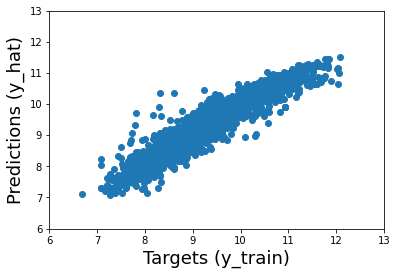

In [103]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

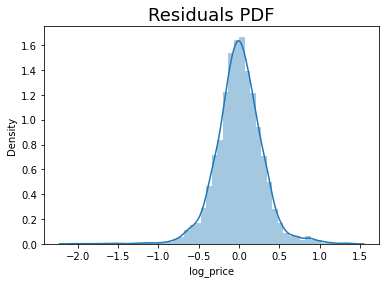

In [104]:
## Residual graph

sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [105]:
reg.score(x_train,y_train)

0.8903025771747615

## Testing

In [106]:
y_hat_test = reg.predict(x_test)

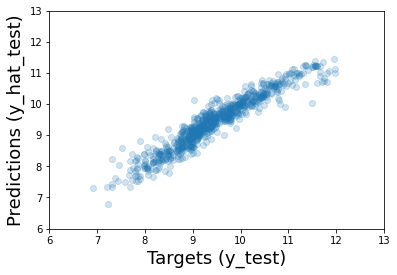

In [107]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

/Applications/Anu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

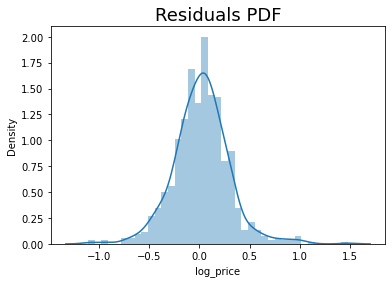

In [108]:
sns.distplot(y_test - y_hat_test)
plt.title("Residuals PDF", size=18)

In [109]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
r2 = metrics.r2_score(y_test, y_hat_test)
print('R2:', r2)



MAE: 0.20691315959500411
MSE: 0.07847105863379762
RMSE: 0.2801268616784146
R2: 0.9077086444744668


In [110]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf['Target'] = np.exp(y_test)
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,11452.516713,9750.0,-1702.516713,17.461710
1,9854.551908,4800.0,-5054.551908,105.303165
2,24277.640536,33000.0,8722.359464,26.431392
3,9772.954167,9900.0,127.045833,1.283291
4,6691.516298,8000.0,1308.483702,16.356046
...,...,...,...,...
773,34731.923758,27500.0,-7231.923758,26.297905
774,34646.583086,37900.0,3253.416914,8.584213
775,4512.139908,4800.0,287.860092,5.997085
776,13667.417235,8300.0,-5367.417235,64.667678
